In [1]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['/System/Library/Fonts/Supplemental/NotoSansYi-Regular.ttf',
 '/System/Library/Fonts/Supplemental/STIXSizOneSymReg.otf',
 '/System/Library/Fonts/Noteworthy.ttc',
 '/Users/ijung-yun/Library/Fonts/SCDream4.otf',
 '/System/Library/Fonts/Supplemental/STIXVar.otf',
 '/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc',
 '/System/Library/Fonts/Supplemental/Myanmar Sangam MN.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansNewTaiLue-Regular.ttf',
 '/System/Library/Fonts/Supplemental/PTSerif.ttc',
 '/System/Library/Fonts/Supplemental/STIXSizFourSymReg.otf',
 '/System/Library/Fonts/NewYork.ttf',
 '/System/Library/Fonts/Supplemental/Galvji.ttc',
 '/System/Library/Fonts/Apple Symbols.ttf',
 '/System/Library/Fonts/Supplemental/Herculanum.ttf',
 '/System/Library/Fonts/SFCompactItalic.ttf',
 '/System/Library/Fonts/NotoSerifMyanmar.ttc',
 '/System/Library/Fonts/MuktaMahee.ttc',
 '/System/Library/Fonts/Supplemental/Farisi.ttf',
 '/System/Library/Fonts/Supplemental/Shree714.ttc',
 '/System/Library/Fonts/Suppl

In [2]:
from matplotlib import font_manager, rc
font_path = '/Users/ijung-yun/Library/Fonts/뫼비우스 Bold.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

데이터 로드

In [584]:
temp = pd.read_csv('../Dataset/dong_area.csv', encoding='utf-8')

In [585]:
temp.head()

,Unnamed: 0,행정동코드,시도명,시군구명,읍면동명
0,0,11110515,서울특별시,종로구,청운효자동
1,1,11110530,서울특별시,종로구,사직동
2,2,11110540,서울특별시,종로구,삼청동
3,3,11110550,서울특별시,종로구,부암동
4,4,11110560,서울특별시,종로구,평창동


In [586]:
temp2 = pd.read_csv('../Dataset/dong_df.csv', encoding='utf-8')
temp2

,Unnamed: 0,읍면동명,관공서수,은행수,종합병원수,일반병원수,약국수,대학교수,백화점수,슈퍼마켓수,극장수,숙박시설수,공항수,철도역수,버스터미널수,지하철역수,버스정거장수
0,0,청운효자동,3,1,0,0,0,2,0,0,0,0,0,0,0,0,2
1,1,사직동,3,3,0,0,3,1,0,0,0,0,0,0,0,2,2
2,2,삼청동,3,1,0,1,0,1,0,0,0,0,0,0,0,0,0
3,3,부암동,2,1,0,0,0,2,0,0,0,0,0,0,0,0,2
4,4,평창동,3,1,0,1,0,1,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,419,성내제2동,0,1,0,2,2,0,0,0,0,0,0,0,0,3,0
420,420,성내제3동,2,2,0,0,2,1,0,0,0,0,0,0,0,1,0
421,421,길동,3,3,1,2,3,1,0,0,0,0,0,0,0,1,2
422,422,둔촌제1동,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [587]:
df = pd.merge(temp2, temp, how='inner', on='읍면동명')
df

,Unnamed: 0_x,읍면동명,관공서수,은행수,종합병원수,일반병원수,약국수,대학교수,백화점수,슈퍼마켓수,...,숙박시설수,공항수,철도역수,버스터미널수,지하철역수,버스정거장수,Unnamed: 0_y,행정동코드,시도명,시군구명
0,0,청운효자동,3,1,0,0,0,2,0,0,...,0,0,0,0,0,2,0,11110515,서울특별시,종로구
1,1,사직동,3,3,0,0,3,1,0,0,...,0,0,0,0,2,2,1,11110530,서울특별시,종로구
2,2,삼청동,3,1,0,1,0,1,0,0,...,0,0,0,0,0,0,2,11110540,서울특별시,종로구
3,3,부암동,2,1,0,0,0,2,0,0,...,0,0,0,0,0,2,3,11110550,서울특별시,종로구
4,4,평창동,3,1,0,1,0,1,0,0,...,0,0,0,0,0,3,4,11110560,서울특별시,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,419,성내제2동,0,1,0,2,2,0,0,0,...,0,0,0,0,3,0,419,11740650,서울특별시,강동구
422,420,성내제3동,2,2,0,0,2,1,0,0,...,0,0,0,0,1,0,420,11740660,서울특별시,강동구
423,421,길동,3,3,1,2,3,1,0,0,...,0,0,0,0,1,2,421,11740685,서울특별시,강동구
424,422,둔촌제1동,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,422,11740690,서울특별시,강동구


In [588]:
df = df.drop(['Unnamed: 0_x', 'Unnamed: 0_y', '행정동코드', '시도명'],axis=1)
df

,읍면동명,관공서수,은행수,종합병원수,일반병원수,약국수,대학교수,백화점수,슈퍼마켓수,극장수,숙박시설수,공항수,철도역수,버스터미널수,지하철역수,버스정거장수,시군구명
0,청운효자동,3,1,0,0,0,2,0,0,0,0,0,0,0,0,2,종로구
1,사직동,3,3,0,0,3,1,0,0,0,0,0,0,0,2,2,종로구
2,삼청동,3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,종로구
3,부암동,2,1,0,0,0,2,0,0,0,0,0,0,0,0,2,종로구
4,평창동,3,1,0,1,0,1,0,0,0,0,0,0,0,0,3,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,성내제2동,0,1,0,2,2,0,0,0,0,0,0,0,0,3,0,강동구
422,성내제3동,2,2,0,0,2,1,0,0,0,0,0,0,0,1,0,강동구
423,길동,3,3,1,2,3,1,0,0,0,0,0,0,0,1,2,강동구
424,둔촌제1동,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,강동구


In [589]:
temp3 = pd.read_csv('../Dataset/구별공원.csv')
temp3 = temp3.rename(columns={'district' : '시군구명', '2020' : '공원수'})
temp3

,시군구명,공원수
0,종로구,105
1,중구,75
2,용산구,108
3,성동구,87
4,광진구,63
5,동대문구,96
6,중랑구,102
7,성북구,135
8,강북구,84
9,도봉구,80


In [590]:
df = pd.merge(temp3, df, how='outer', on='시군구명')
df

,시군구명,공원수,읍면동명,관공서수,은행수,종합병원수,일반병원수,약국수,대학교수,백화점수,슈퍼마켓수,극장수,숙박시설수,공항수,철도역수,버스터미널수,지하철역수,버스정거장수
0,종로구,105,청운효자동,3,1,0,0,0,2,0,0,0,0,0,0,0,0,2
1,종로구,105,사직동,3,3,0,0,3,1,0,0,0,0,0,0,0,2,2
2,종로구,105,삼청동,3,1,0,1,0,1,0,0,0,0,0,0,0,0,0
3,종로구,105,부암동,2,1,0,0,0,2,0,0,0,0,0,0,0,0,2
4,종로구,105,평창동,3,1,0,1,0,1,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,125,성내제2동,0,1,0,2,2,0,0,0,0,0,0,0,0,3,0
422,강동구,125,성내제3동,2,2,0,0,2,1,0,0,0,0,0,0,0,1,0
423,강동구,125,길동,3,3,1,2,3,1,0,0,0,0,0,0,0,1,2
424,강동구,125,둔촌제1동,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


데이터 전처리

In [591]:
df['시군구명'].value_counts()

송파구     27
강남구     23
관악구     22
성북구     20
강서구     20
노원구     19
서초구     18
영등포구    18
양천구     18
종로구     17
강동구     17
성동구     17
은평구     16
마포구     16
구로구     16
중랑구     16
용산구     16
중구      15
동작구     15
광진구     15
도봉구     14
동대문구    14
서대문구    14
강북구     13
금천구     10
Name: 시군구명, dtype: int64

In [592]:
df['관공서_은행'] = df['관공서수'] + df['은행수']
df['의료'] = df['종합병원수'] + df['일반병원수'] + df['약국수']
df['쇼핑_여가'] = df['백화점수'] + df['슈퍼마켓수'] + df['극장수'] + df['숙박시설수']
df['교통'] = df['철도역수'] + df['버스터미널수'] + df['지하철역수'] + df['버스정거장수']
df 

,시군구명,공원수,읍면동명,관공서수,은행수,종합병원수,일반병원수,약국수,대학교수,백화점수,...,숙박시설수,공항수,철도역수,버스터미널수,지하철역수,버스정거장수,관공서_은행,의료,쇼핑_여가,교통
0,종로구,105,청운효자동,3,1,0,0,0,2,0,...,0,0,0,0,0,2,4,0,0,2
1,종로구,105,사직동,3,3,0,0,3,1,0,...,0,0,0,0,2,2,6,3,0,4
2,종로구,105,삼청동,3,1,0,1,0,1,0,...,0,0,0,0,0,0,4,1,0,0
3,종로구,105,부암동,2,1,0,0,0,2,0,...,0,0,0,0,0,2,3,0,0,2
4,종로구,105,평창동,3,1,0,1,0,1,0,...,0,0,0,0,0,3,4,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,125,성내제2동,0,1,0,2,2,0,0,...,0,0,0,0,3,0,1,4,0,3
422,강동구,125,성내제3동,2,2,0,0,2,1,0,...,0,0,0,0,1,0,4,2,0,1
423,강동구,125,길동,3,3,1,2,3,1,0,...,0,0,0,0,1,2,6,6,0,3
424,강동구,125,둔촌제1동,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [593]:
df.loc[256,:]

시군구명      강서구
공원수       175
읍면동명      공항동
관공서수        3
은행수         3
종합병원수       1
일반병원수       0
약국수         2
대학교수        2
백화점수        0
슈퍼마켓수       0
극장수         0
숙박시설수       0
공항수        25
철도역수        0
버스터미널수      0
지하철역수       2
버스정거장수      3
관공서_은행      6
의료          3
쇼핑_여가       0
교통          5
Name: 256, dtype: object

In [594]:
df.columns

Index(['시군구명', '공원수', '읍면동명', '관공서수', '은행수', '종합병원수', '일반병원수', '약국수', '대학교수',
       '백화점수', '슈퍼마켓수', '극장수', '숙박시설수', '공항수', '철도역수', '버스터미널수', '지하철역수',
       '버스정거장수', '관공서_은행', '의료', '쇼핑_여가', '교통'],
      dtype='object')

In [595]:
df_x = df.drop(['공원수', '시군구명', '읍면동명', '관공서수', '은행수', '종합병원수', '일반병원수', '약국수', '대학교수',
       '백화점수', '슈퍼마켓수', '극장수', '숙박시설수', '공항수', '철도역수', '버스터미널수', '지하철역수',
       '버스정거장수'], axis=1)
df_x

,관공서_은행,의료,쇼핑_여가,교통
0,4,0,0,2
1,6,3,0,4
2,4,1,0,0
3,3,0,0,2
4,4,1,0,3
...,...,...,...,...
421,1,4,0,3
422,4,2,0,1
423,6,6,0,3
424,0,0,0,1


In [596]:
df_o = df.drop(['공원수', '시군구명', '읍면동명', '관공서_은행', '의료', '쇼핑_여가', '교통','공항수','버스터미널수','철도역수'], axis=1)
df_o

,관공서수,은행수,종합병원수,일반병원수,약국수,대학교수,백화점수,슈퍼마켓수,극장수,숙박시설수,지하철역수,버스정거장수
0,3,1,0,0,0,2,0,0,0,0,0,2
1,3,3,0,0,3,1,0,0,0,0,2,2
2,3,1,0,1,0,1,0,0,0,0,0,0
3,2,1,0,0,0,2,0,0,0,0,0,2
4,3,1,0,1,0,1,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,1,0,2,2,0,0,0,0,0,3,0
422,2,2,0,0,2,1,0,0,0,0,1,0
423,3,3,1,2,3,1,0,0,0,0,1,2
424,0,0,0,0,0,0,0,0,0,0,1,0


In [597]:
df_x.corr()

,관공서_은행,의료,쇼핑_여가,교통
관공서_은행,1.000000,0.531646,0.199186,0.468186
의료,0.531646,1.000000,0.192371,0.310437
쇼핑_여가,0.199186,0.192371,1.000000,0.185948
교통,0.468186,0.310437,0.185948,1.000000


<AxesSubplot:>

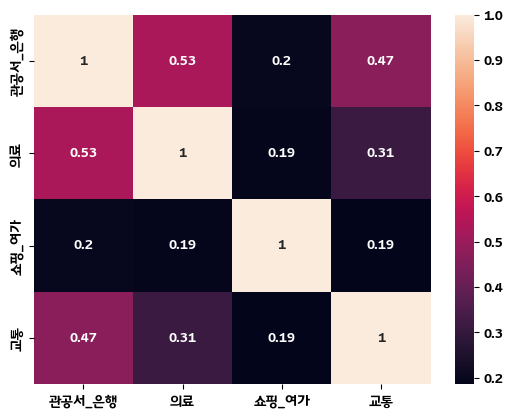

In [598]:
sns.heatmap(df_x.corr(), annot=True)

In [783]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
data_scaled = StandardScaler().fit_transform(df_x)
data_scaled1 = StandardScaler().fit_transform(df_o)
data_minmax = MinMaxScaler().fit_transform(df_x)
data_minmax1 = MinMaxScaler().fit_transform(df_o)

In [784]:
pd.DataFrame(data_scaled).describe().round(2), pd.DataFrame(data_minmax).describe().round(2)

(            0       1       2       3
 count  426.00  426.00  426.00  426.00
 mean    -0.00   -0.00    0.00    0.00
 std      1.00    1.00    1.00    1.00
 min     -1.53   -1.24   -0.66   -1.48
 25%     -0.98   -0.63   -0.66   -0.86
 50%      0.12   -0.02   -0.66   -0.25
 75%      0.67    0.59    0.24    0.36
 max      1.77    2.43    3.83    2.20,
             0       1       2       3
 count  426.00  426.00  426.00  426.00
 mean     0.46    0.34    0.15    0.40
 std      0.30    0.27    0.22    0.27
 min      0.00    0.00    0.00    0.00
 25%      0.17    0.17    0.00    0.17
 50%      0.50    0.33    0.00    0.33
 75%      0.67    0.50    0.20    0.50
 max      1.00    1.00    1.00    1.00)

In [785]:
from sklearn.decomposition import PCA

In [786]:
pca = PCA(n_components=2)
pc = pca.fit_transform(data_scaled)

In [787]:
pcd = pd.DataFrame(pc)
pcd

,0,1
0,-0.611633,-0.512861
1,1.649914,-1.266291
2,-0.904641,-0.449663
3,-0.937350,-0.391322
4,0.028785,-0.712143
...,...,...
421,0.039461,-0.682894
422,-0.264223,-0.648945
423,2.326600,-1.514164
424,-2.225644,0.060787


In [788]:
pcd.sort_values(1, ascending=False)

,0,1
267,1.809028,3.412043
198,2.109153,3.368345
81,2.138304,3.300254
12,-0.084092,3.080091
16,0.538192,2.905105
...,...,...
356,2.290332,-1.465573
423,2.326600,-1.514164
288,2.601474,-1.553066
368,2.619608,-1.577362


/Users/ijung-yun/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


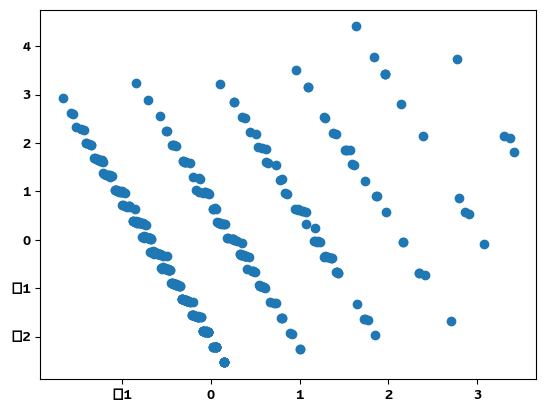

In [789]:
plt.figure()
plt.scatter(pcd[1],pcd[0],)
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
plt.show()

KeyError: 2

<Figure size 640x480 with 0 Axes>

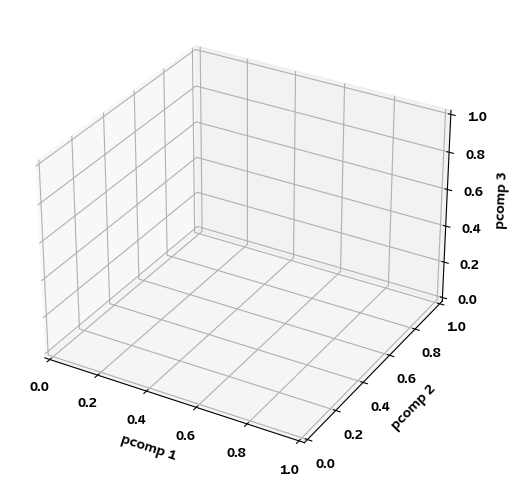

In [790]:
plt.figure()
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
ax.scatter(pcd[0],pcd[1],pcd[2])

### DBSCAN

In [791]:
from sklearn.cluster import DBSCAN

In [847]:
# dbscan = DBSCAN(eps=0.7, min_samples=6) 이게 최선으로 보임
# dbscan = DBSCAN(eps=0.7, min_samples=5) 는 예외되는 값이 더 적어보임
dbscan = DBSCAN(eps=0.7, min_samples=5)

# DBSCAN은 fit_predict()가 학습이다.
dbscan_data = dbscan.fit_predict(pc)

dbscan_data

array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0, -1,  0,  0,  0, -1,
        2,  1,  2,  3,  4,  1,  2,  2,  3,  0,  0,  0,  0,  2,  2,  4,  0,
        2,  4,  4,  4,  0,  0,  1,  3,  0,  4,  0,  4,  0,  0,  0,  0,  0,
        3,  3,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  3,  0,  0,  3,
        0,  3,  0,  0,  0,  0,  3,  3,  3,  0,  0,  3,  1, -1,  2,  0,  0,
        4,  0,  3,  4,  0,  3,  0,  0,  0,  2,  0,  4,  2,  3,  3,  0,  4,
        0,  4,  0,  0,  1,  4,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,
        0,  0,  3,  0,  0,  3,  0,  0,  0,  3,  2,  0,  0,  3,  4,  0,  0,
        3,  0,  3,  0,  0,  0,  3,  0,  0,  3,  0,  0,  3,  3,  0,  4,  3,
        0,  0,  0,  0,  0,  0,  0,  3,  3,  0,  0,  0,  0,  0,  0,  0,  0,
        4,  4,  0,  0,  0,  0,  3,  0,  4,  0,  0,  0,  0,  0,  0,  4,  0,
        0,  0,  4,  4,  0,  3,  0,  0,  2,  3,  3, -1,  3,  3,  0,  4,  0,
        0,  0,  3,  4,  4,  0,  4,  4,  0,  0,  4,  0,  3,  0,  0,  3,  3,
        3,  0,  3,  0,  0

In [848]:
db_pred = pd.DataFrame(dbscan_data, columns=['dbscan2_label'])
db_pred.value_counts() 

dbscan2_label
 0               254
 3                87
 4                47
 2                22
-1                 9
 1                 7
dtype: int64

In [849]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(pc, dbscan_data)

0.17414747360815158

In [850]:
pcd['cluster_id'] = db_pred
pcd

,0,1,cluster_id
0,-0.611633,-0.512861,0
1,1.649914,-1.266291,0
2,-0.904641,-0.449663,0
3,-0.937350,-0.391322,0
4,0.028785,-0.712143,0
...,...,...,...
421,0.039461,-0.682894,0
422,-0.264223,-0.648945,0
423,2.326600,-1.514164,0
424,-2.225644,0.060787,0


NameError: name 'c' is not defined

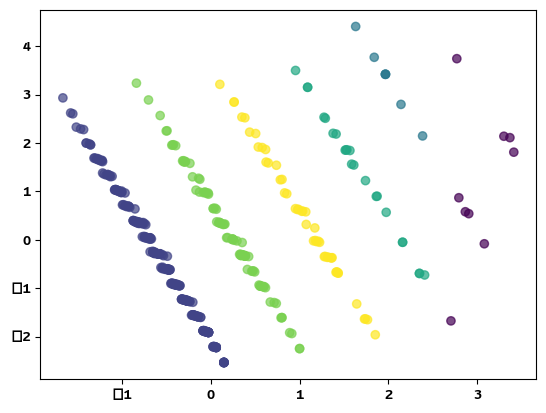

In [853]:
plt.figure()
plt.scatter(pcd[1],pcd[0], c=pcd['cluster_id'], alpha=0.7)
plt.legend()
plt.show()

In [854]:
test = df_x[:2]
test
test_scaled = StandardScaler().fit_transform(test)
pc_test = pca.fit_transform(test_scaled)

In [855]:
dbscan.fit_predict(pc_test)

array([-1, -1])

### K-means

In [750]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=6, max_iter=400, random_state=5)

In [751]:
km.fit_transform(pc)
km.labels_

array([4, 0, 1, 1, 4, 1, 4, 1, 2, 2, 4, 0, 3, 1, 1, 1, 3, 2, 2, 2, 5, 3,
       2, 2, 2, 5, 4, 1, 1, 1, 3, 3, 3, 1, 2, 5, 3, 3, 1, 1, 2, 0, 1, 3,
       4, 2, 1, 1, 1, 0, 4, 5, 0, 1, 1, 1, 4, 1, 4, 4, 1, 3, 4, 1, 5, 4,
       4, 1, 4, 5, 1, 1, 4, 4, 1, 5, 5, 1, 4, 5, 2, 2, 2, 1, 4, 5, 0, 5,
       2, 1, 5, 1, 4, 1, 3, 1, 3, 2, 1, 5, 4, 3, 1, 5, 4, 4, 2, 3, 4, 4,
       4, 4, 4, 1, 1, 0, 5, 1, 4, 1, 4, 5, 4, 0, 1, 0, 4, 4, 1, 2, 4, 4,
       5, 2, 1, 4, 5, 1, 5, 1, 4, 4, 0, 1, 4, 1, 0, 4, 5, 0, 4, 3, 5, 1,
       0, 1, 1, 4, 4, 4, 0, 0, 4, 1, 1, 1, 1, 4, 4, 4, 3, 3, 0, 1, 1, 1,
       0, 0, 3, 4, 4, 1, 4, 4, 1, 5, 0, 1, 1, 3, 5, 0, 5, 1, 0, 2, 0, 5,
       2, 1, 1, 4, 3, 4, 1, 4, 0, 2, 2, 4, 2, 3, 1, 0, 2, 4, 1, 1, 1, 5,
       0, 0, 0, 5, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 4, 4, 0, 4,
       1, 0, 0, 1, 1, 4, 4, 4, 1, 2, 1, 1, 0, 0, 0, 5, 5, 1, 2, 3, 2, 2,
       3, 0, 3, 2, 4, 5, 1, 1, 4, 4, 5, 1, 2, 2, 1, 5, 1, 2, 1, 1, 1, 4,
       3, 2, 0, 2, 0, 1, 2, 5, 5, 3, 5, 1, 3, 3, 5,

/Users/ijung-yun/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


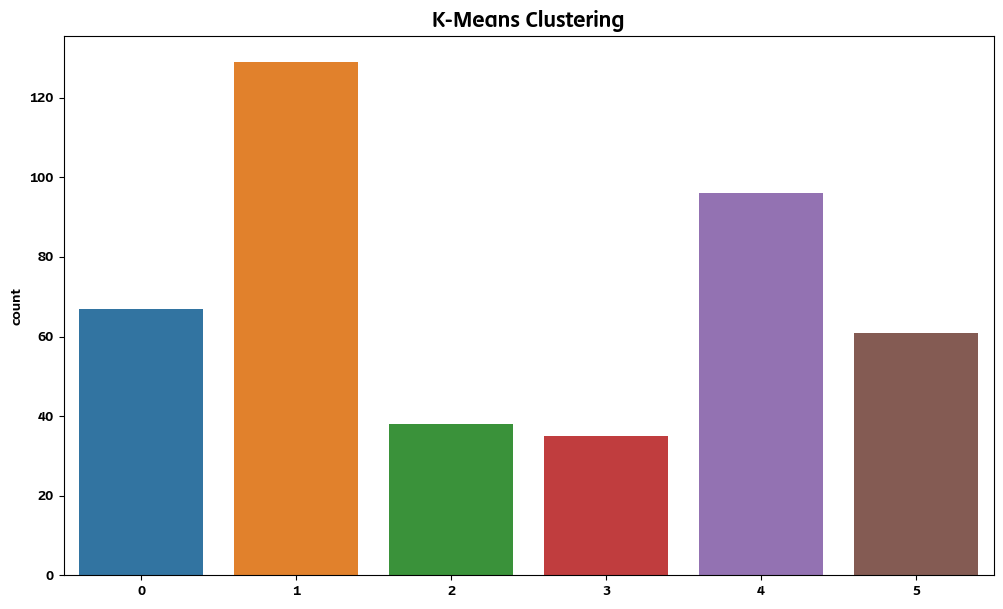

In [752]:
plt.figure(figsize=(12, 7))
sns.countplot(km.labels_)
plt.title('K-Means Clustering', fontsize=15)
plt.show()

In [753]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(pc, km.labels_)
score

0.4575882951149556

In [754]:
pcd = pd.DataFrame(pc)
pcd['cluster_id'] = km.labels_
pcd

,0,1,cluster_id
0,-0.611633,-0.512861,4
1,1.649914,-1.266291,0
2,-0.904641,-0.449663,1
3,-0.937350,-0.391322,1
4,0.028785,-0.712143,4
...,...,...,...
421,0.039461,-0.682894,4
422,-0.264223,-0.648945,4
423,2.326600,-1.514164,0
424,-2.225644,0.060787,1


/Users/ijung-yun/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


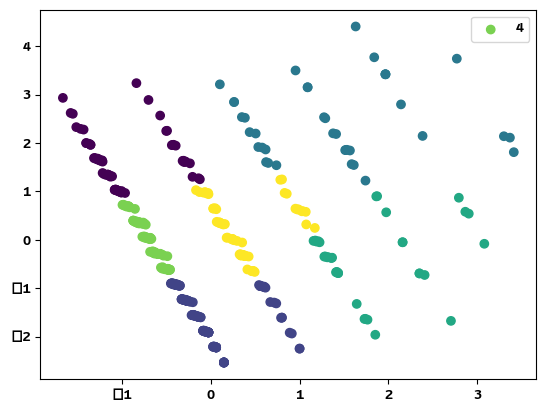

In [755]:
plt.figure()
plt.scatter(pcd[1],pcd[0], c=pcd['cluster_id'])
plt.legend((pcd['cluster_id']))
plt.show()

KeyError: 2

<Figure size 640x480 with 0 Axes>

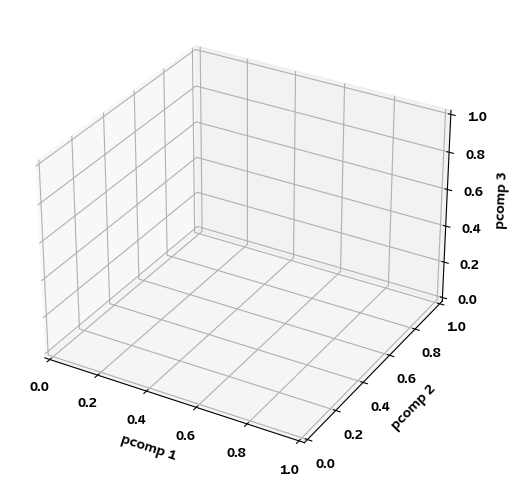

In [742]:
plt.figure()
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
ax.scatter(pcd[0],pcd[1],pcd[2], c=pcd['cluster_id'] , s=10)